In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (10, 10))

In [52]:
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [53]:
path = "C:\\Users\\vinic\\Documents\\GitHub\\Enem\\2018\\Microdados_2018_MG_Tratado.csv"


In [54]:
dadosEnem = pd.read_csv(path,sep=';',encoding='latin1',low_memory=False)

 <font color='red'>
    
## Ao agrupar valores/ trocar valores é importante considerar
### Se estamos trocando valores para gerar melhores visualizações
### Se estamos trocando valores para facilitar o trabalho dos algoritmos
### E qual algoritmo estamos focando

</font> 




# Agrupar faixas de Renda Q006
## De A ~ E -> Grupo 1
## De F ~ N -> Grupo 2
## De O ~   -> Grupo 3

In [55]:
var = "Q006"
dadosEnem[var].replace(to_replace =['A','B','C','D','E'], 
                 value ="1",inplace=True) 
dadosEnem[var].replace(to_replace =['F','G','H','I','J','K','L','M','N'], 
                 value ="2",inplace=True) 
dadosEnem[var].replace(to_replace =['O','P','Q'], 
                 value ="3",inplace=True) 
var = "Q027"
dadosEnem[var].replace(to_replace =['A'], 
                 value ="Publica",inplace=True) 
dadosEnem[var].replace(to_replace =['B', 'C'], 
                 value ="Parcial Particular",inplace=True) 
dadosEnem[var].replace(to_replace =['D', 'E'], 
                 value ="Totalmente Particular",inplace=True) 

var = 'TP_DEPENDENCIA_ADM_ESC'
dadosEnem[var].replace(to_replace =[1.0], 
                 value ="Federal",inplace=True) 
dadosEnem[var].replace(to_replace =[2.0], 
                 value ="Estadual",inplace=True) 
dadosEnem[var].replace(to_replace =[3.0], 
                 value ="Municipal",inplace=True) 
dadosEnem[var].replace(to_replace =[4.0], 
                 value ="Particular",inplace=True) 

var = 'Q025'
dadosEnem[var].replace(to_replace =['A'], 
                 value ="Não",inplace=True) 
dadosEnem[var].replace(to_replace =['B'], 
                 value ="Sim",inplace=True) 

dadosEnem[var].replace(to_replace =[3.0], 
                 value ="Municipal",inplace=True) 
dadosEnem[var].replace(to_replace =[4.0], 
                 value ="Particular",inplace=True) 

var = 'Q025'
dadosEnem[var].replace(to_replace =['A'], 
                 value ="Não",inplace=True) 
dadosEnem[var].replace(to_replace =['B'], 
                 value ="Sim",inplace=True) 

dadosEnem[var].replace(to_replace =[3.0], 
                 value ="Municipal",inplace=True) 
dadosEnem[var].replace(to_replace =[4.0], 
                 value ="Particular",inplace=True) 

var = 'Q024'
dadosEnem[var].replace(to_replace =['A'], 
                 value ="Não",inplace=True) 
dadosEnem[var].replace(to_replace =['B'], 
                 value ="Um",inplace=True) 
dadosEnem[var].replace(to_replace =['C'], 
                 value ="Dois",inplace=True)
dadosEnem[var].replace(to_replace =['D'], 
                 value ="Três",inplace=True)
dadosEnem[var].replace(to_replace =['E'], 
                 value ="4 ou mais",inplace=True)

var = 'Q022'
dadosEnem[var].replace(to_replace =['A'], 
                 value ="Não",inplace=True) 
dadosEnem[var].replace(to_replace =['B'], 
                 value ="Um",inplace=True) 
dadosEnem[var].replace(to_replace =['C'], 
                 value ="Dois",inplace=True)
dadosEnem[var].replace(to_replace =['D'], 
                 value ="Três",inplace=True)
dadosEnem[var].replace(to_replace =['E'], 
                 value ="4 ou mais",inplace=True)


var = 'Q009'
dadosEnem[var].replace(to_replace =['A'], 
                 value =0,inplace=True) 
dadosEnem[var].replace(to_replace =['B'], 
                 value =1,inplace=True) 
dadosEnem[var].replace(to_replace =['C'], 
                 value =2,inplace=True)
dadosEnem[var].replace(to_replace =['D'], 
                 value =3,inplace=True)
dadosEnem[var].replace(to_replace =['E'], 
                 value =4,inplace=True)

In [56]:
dadosEnem[var].value_counts()

3    49521
2    44584
4     8994
1     4346
0      180
Name: Q009, dtype: int64

Text(0.5, 0, ' ')

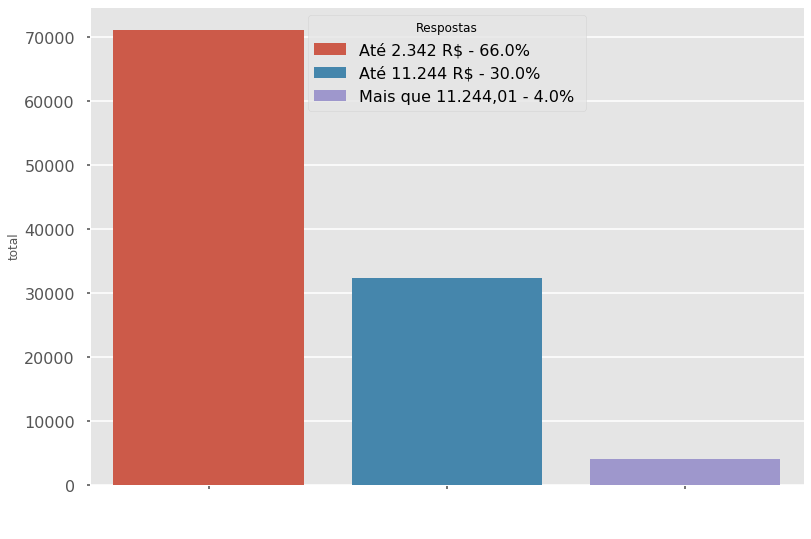

In [57]:
area = plt.figure()



var = "Q006"
array = pd.DataFrame(dadosEnem[var].value_counts())
array2 = pd.DataFrame(dadosEnem[var].value_counts(normalize=True) * 100).round()
array['Porcentagem'] = array2
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas","total"]
contagem_de_questionario.Respostas = ['Até 2.342 R$ - ' + str(array['Porcentagem'][0]) + '% ','Até 11.244 R$ - ' + str(array['Porcentagem'][1]) +  '% ','Mais que 11.244,01 - ' + str(array['Porcentagem'][2]) +  '% ']
contagem_de_questionario



g = sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario, hue = "Respostas",dodge = False)
g.set_xticklabels(" ")
g.set_xlabel(" ")

In [58]:
agrupado = dadosEnem.groupby('Q006')

# Analisando Faixas de Renda

In [59]:
Grupo_1 = agrupado.get_group("1")
Grupo_2 = agrupado.get_group("2")
Grupo_3 = agrupado.get_group("3")

In [60]:
def my_distplot(Grupo,var,G):
    G = sns.distplot(Grupo[var],kde=False, rug=True)
    G.set(xlabel=' ')
    #plt.title('Quantidade de pessoas na casa')

In [61]:
def my_function(Grupo,var,G):
    array = pd.DataFrame(Grupo[var].value_counts())
    array2 = pd.DataFrame(Grupo[var].value_counts(normalize=True) * 100).round()
    array['Porcentagem'] = array2
    array

    tipo_escola = Grupo[var].value_counts().to_frame().reset_index()
    tipo_escola.columns = ["Respostas", "total"]
    tipo_escola.sort_values('Respostas',  ascending=True, inplace=True)
    print(array)
    #tipo_escola.Tipo_Escola = ['Pública ' + str(array['Porcentagem'][2]) + '%','Exterior ' + str(array['Porcentagem'][4]) + '%','Privada ' + str(array['Porcentagem'][1]) + '%','Não Respondeu ' + str(array['Porcentagem'][3]) + '%']
    total = float(len(tipo_escola))
    G = sns.barplot(x="Respostas", y = "total", data = tipo_escola)
    G.set_xlabel(" ")
    G.set_ylabel(" ")

                        Q027  Porcentagem
Publica                64390         90.0
Parcial Particular      4465          6.0
Totalmente Particular   2348          3.0
                        Q027  Porcentagem
Publica                17049         53.0
Totalmente Particular   9900         31.0
Parcial Particular      5471         17.0
                       Q027  Porcentagem
Totalmente Particular  3247         81.0
Publica                 399         10.0
Parcial Particular      356          9.0


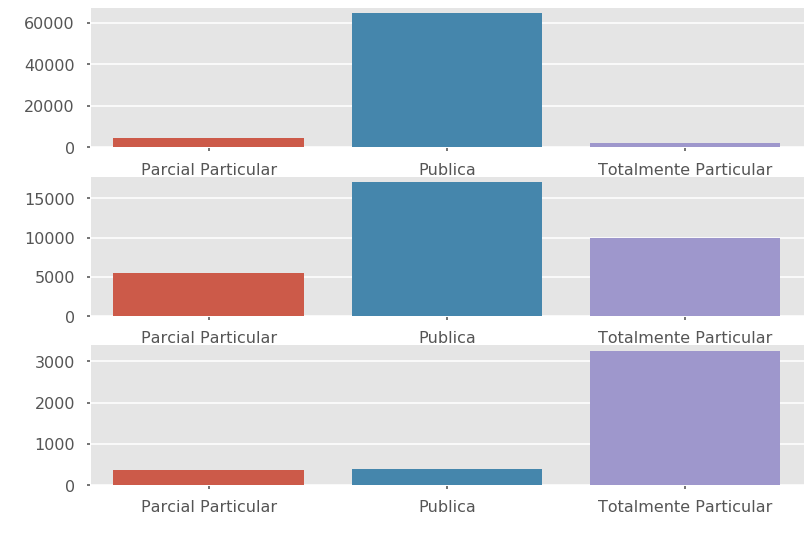

In [62]:
area = plt.figure()
var = 'Q027'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,'Q027',g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,'Q027',g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,'Q027',g3)





#g4 = area.add_subplot(2, 2, 4)


# Tipo de Dependencia Administrativa Escola

            TP_DEPENDENCIA_ADM_ESC  Porcentagem
Estadual                     63704         89.0
Particular                    4138          6.0
Federal                       2527          4.0
Municipal                      834          1.0
            TP_DEPENDENCIA_ADM_ESC  Porcentagem
Estadual                     16491         51.0
Particular                   12824         40.0
Federal                       2726          8.0
Municipal                      379          1.0
            TP_DEPENDENCIA_ADM_ESC  Porcentagem
Particular                    3471         87.0
Estadual                       356          9.0
Federal                        168          4.0
Municipal                        7          0.0


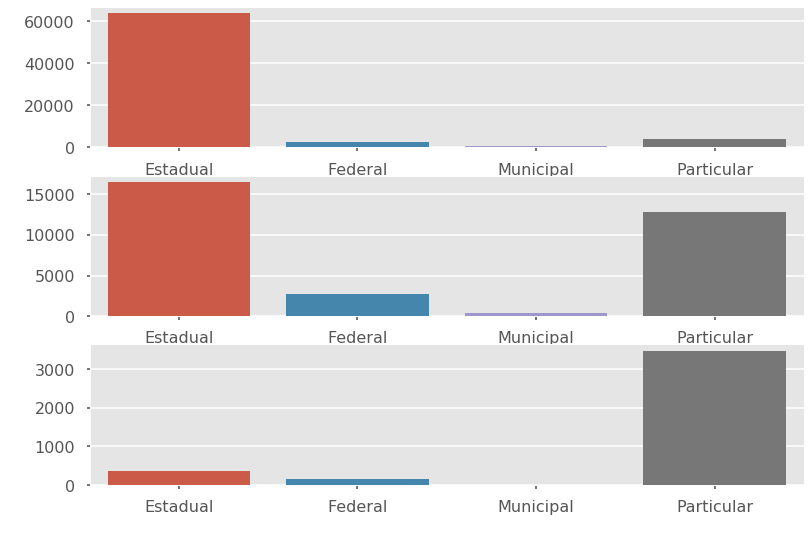

In [63]:

area = plt.figure()
var = 'TP_DEPENDENCIA_ADM_ESC'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)

#1	Federal
#2	Estadual
#3	Municipal
#4	Privada



# Internet

      Q025  Porcentagem
Sim  53200         75.0
Não  18003         25.0
      Q025  Porcentagem
Sim  31502         97.0
Não    918          3.0
     Q025  Porcentagem
Sim  3984        100.0
Não    18          0.0


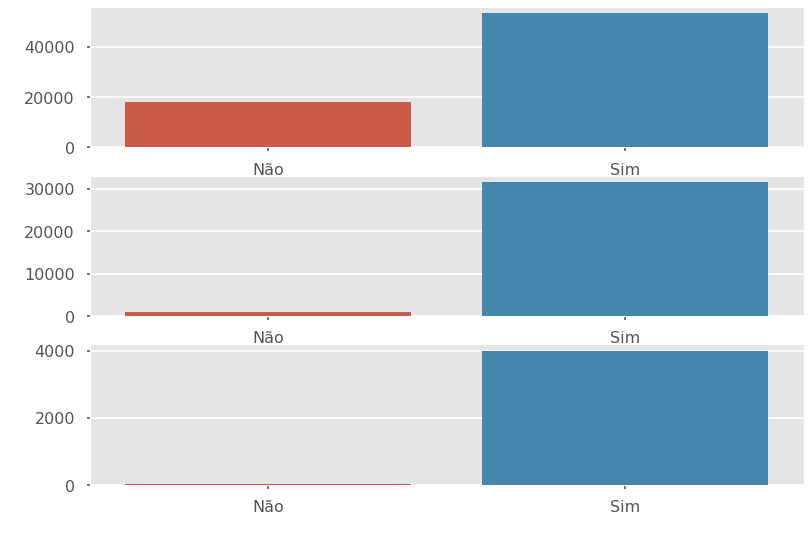

In [64]:
area = plt.figure()
var = 'Q025'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)




# Computador

            Q024  Porcentagem
Um         37500         53.0
Não        30404         43.0
Dois        2868          4.0
Três         343          0.0
4 ou mais     88          0.0
            Q024  Porcentagem
Um         19976         62.0
Dois        6513         20.0
Não         3214         10.0
Três        2083          6.0
4 ou mais    634          2.0
           Q024  Porcentagem
Dois       1230         31.0
Um         1123         28.0
Três        884         22.0
4 ou mais   685         17.0
Não          80          2.0


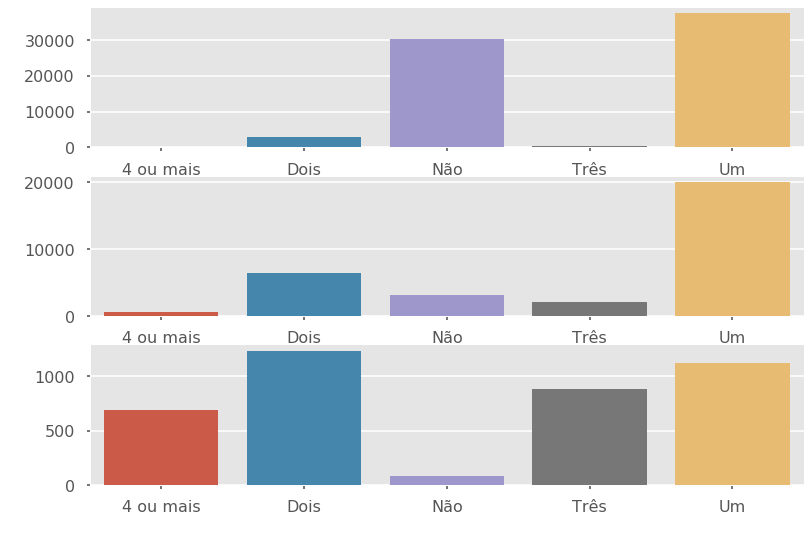

In [65]:
area = plt.figure()
var = 'Q024'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)




# Telefone Celular

            Q022  Porcentagem
Dois       23620         33.0
Três       21924         31.0
Um         13203         19.0
4 ou mais  11178         16.0
Não         1278          2.0
            Q022  Porcentagem
4 ou mais  13427         41.0
Três       12936         40.0
Dois        4752         15.0
Um          1140          4.0
Não          165          1.0
           Q022  Porcentagem
4 ou mais  2588         65.0
Três       1078         27.0
Dois        240          6.0
Um           62          2.0
Não          34          1.0


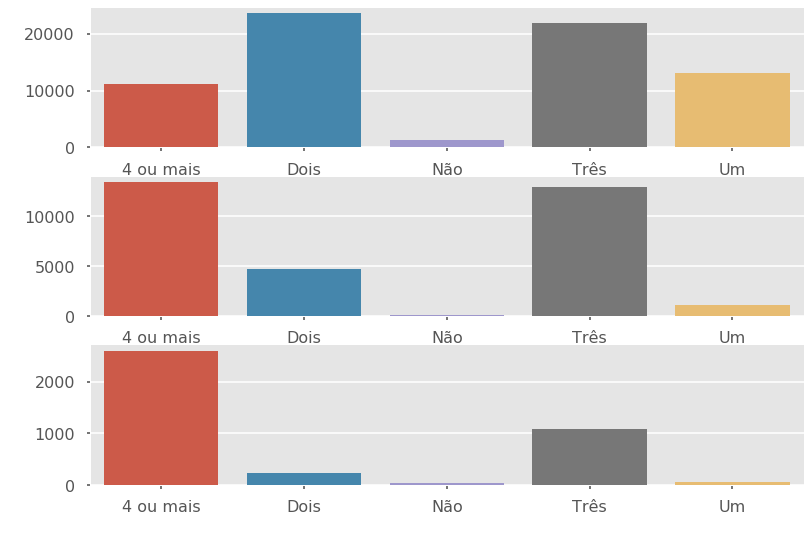

In [66]:
area = plt.figure()
var = 'Q022'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)




# Trabalho do Pai

    Q003  Porcentagem
C  21764         31.0
B  16397         23.0
A  16385         23.0
F   8264         12.0
D   7606         11.0
E    787          1.0
    Q003  Porcentagem
D  13281         41.0
C   7892         24.0
E   4112         13.0
B   3720         11.0
F   1842          6.0
A   1573          5.0
   Q003  Porcentagem
E  2763         69.0
D   998         25.0
F    73          2.0
C    73          2.0
A    55          1.0
B    40          1.0


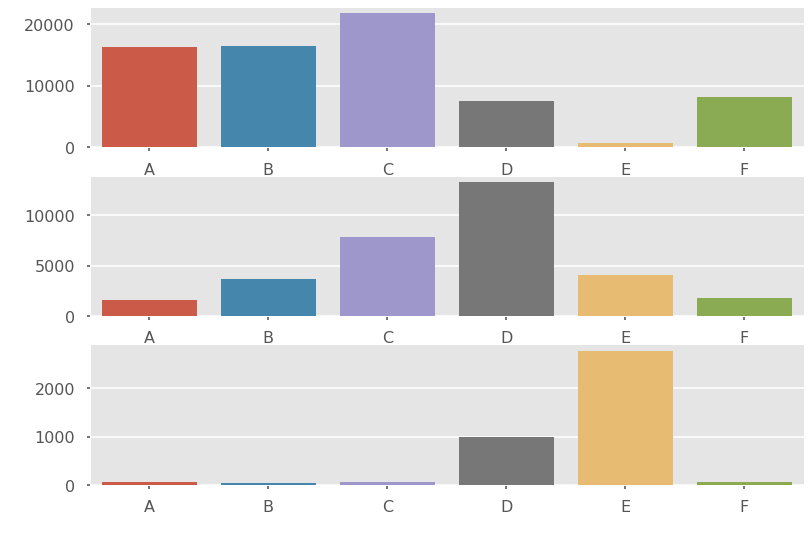

In [67]:
area = plt.figure()
var = 'Q003'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)


# Trabalho da mãe

    Q004  Porcentagem
B  38519         54.0
A  10396         15.0
D   9855         14.0
F   6045          8.0
C   5902          8.0
E    486          1.0
    Q004  Porcentagem
D  15349         47.0
B   9165         28.0
E   2674          8.0
F   2574          8.0
C   1996          6.0
A    662          2.0
   Q004  Porcentagem
E  1846         46.0
D  1552         39.0
F   288          7.0
B   239          6.0
C    51          1.0
A    26          1.0


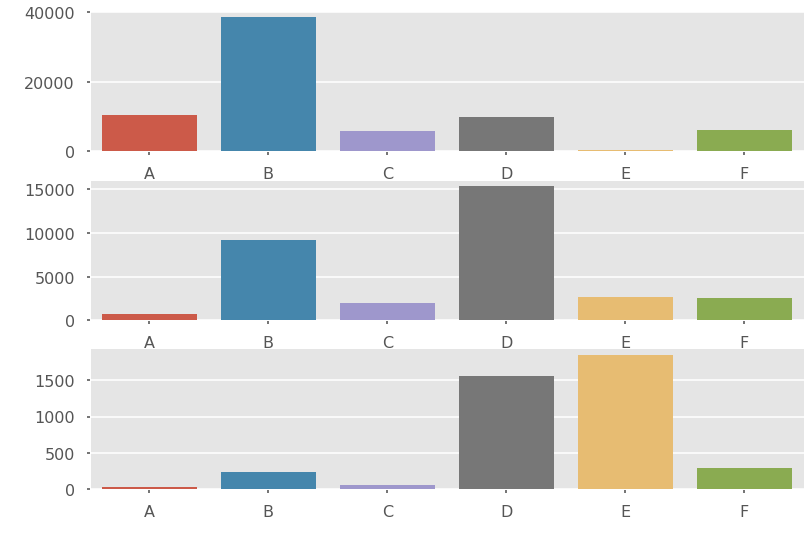

In [68]:
area = plt.figure()
var = 'Q004'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)


# Estudo do Pai

    Q001  Porcentagem
B  16492         23.0
E  16367         23.0
C  15547         22.0
D  10676         15.0
H   7077         10.0
F   2299          3.0
A   2006          3.0
G    739          1.0
    Q001  Porcentagem
E  12346         38.0
F   5701         18.0
D   4264         13.0
C   3552         11.0
G   3290         10.0
B   1934          6.0
H   1230          4.0
A    103          0.0
   Q001  Porcentagem
G  1862         47.0
F  1239         31.0
E   615         15.0
D   144          4.0
C    63          2.0
H    51          1.0
B    27          1.0
A     1          0.0


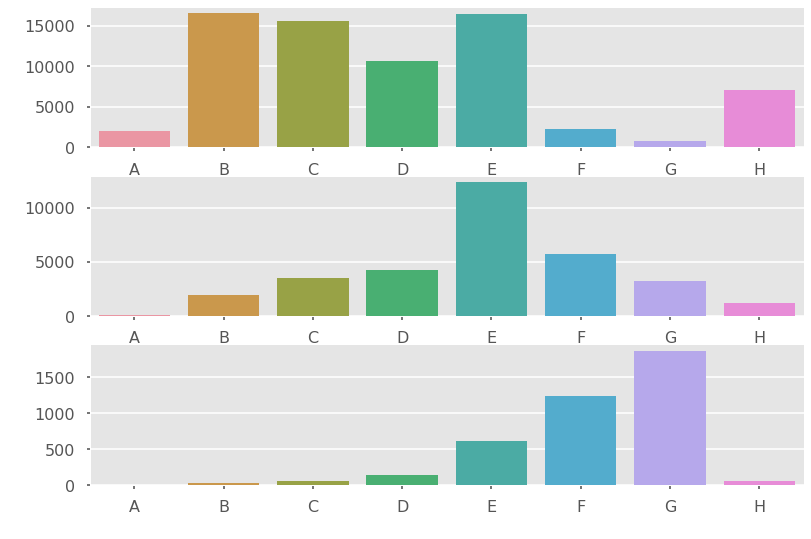

In [69]:
area = plt.figure()
var = 'Q001'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)


# Estudo da Mãe

    Q002  Porcentagem
E  23427         33.0
C  13767         19.0
D  12030         17.0
B  11636         16.0
F   4567          6.0
G   2278          3.0
H   2246          3.0
A   1252          2.0
    Q002  Porcentagem
E  11341         35.0
G   7025         22.0
F   6962         21.0
D   3190         10.0
C   2337          7.0
B   1016          3.0
H    481          1.0
A     68          0.0
   Q002  Porcentagem
G  1841         46.0
F  1274         32.0
E   667         17.0
D   106          3.0
C    59          1.0
H    37          1.0
B    14          0.0
A     4          0.0


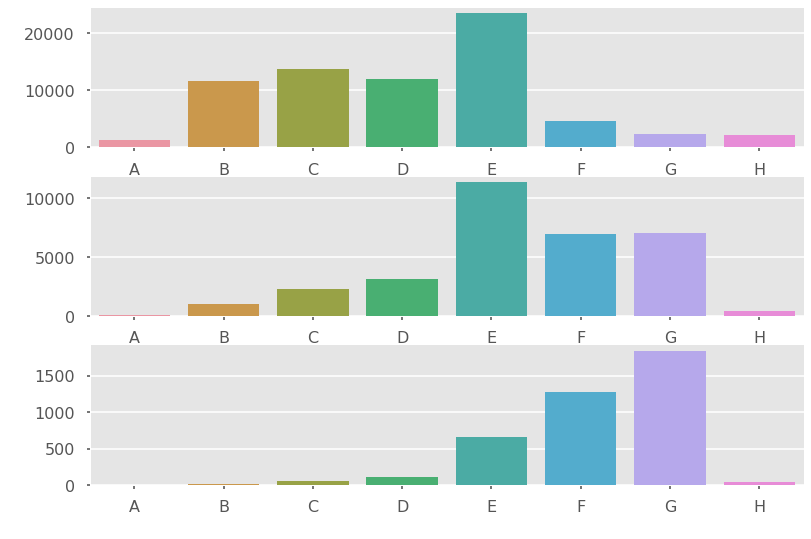

In [70]:
area = plt.figure()
var = 'Q002'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)


# Número de pessoas na casa

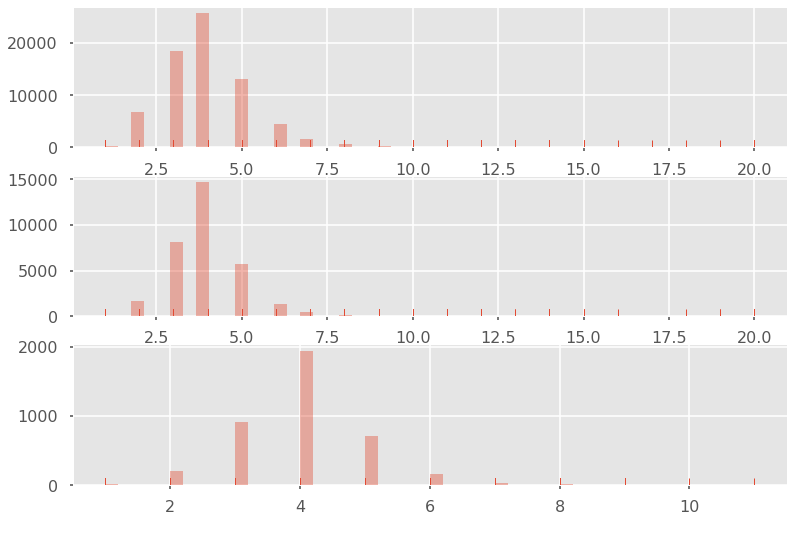

In [71]:
area = plt.figure()
var = 'Q005'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)




# Número de quartos para dormir

    Q009  Porcentagem
2  35630         50.0
3  27945         39.0
1   4043          6.0
4   3420          5.0
0    165          0.0
    Q009  Porcentagem
3  19605         60.0
2   8701         27.0
4   3816         12.0
1    285          1.0
0     13          0.0
   Q009  Porcentagem
3  1971         49.0
4  1758         44.0
2   253          6.0
1    18          0.0
0     2          0.0


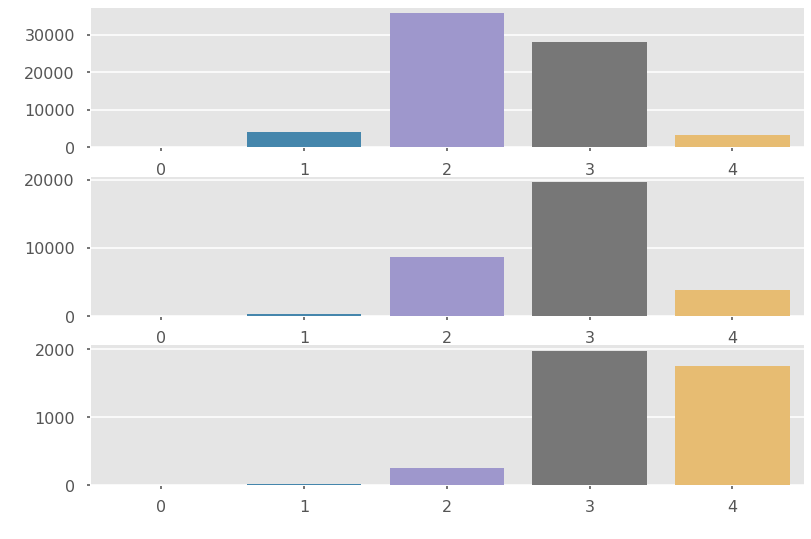

In [72]:
area = plt.figure()
var = 'Q009'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)

In [73]:
#Tentar contabilizar razão moradores/quartos por grupo


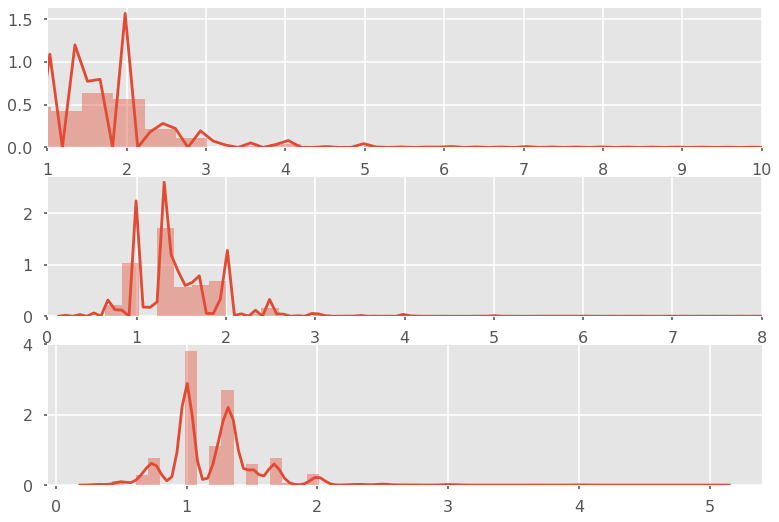

In [110]:
pessoas = 'Q005'
quartos = 'Q009'

pessoasPorQuarto_1 = pd.DataFrame(Grupo_1[pessoas]/Grupo_1[quartos])
pessoasPorQuarto_2 = pd.DataFrame(Grupo_2[pessoas]/Grupo_2[quartos])
pessoasPorQuarto_3 = pd.DataFrame(Grupo_3[pessoas]/Grupo_3[quartos])

pessoasPorQuarto_1.replace([np.inf, -np.inf], np.nan, inplace=True)
pessoasPorQuarto_2.replace([np.inf, -np.inf], np.nan, inplace=True)
pessoasPorQuarto_3.replace([np.inf, -np.inf], np.nan, inplace=True)

area = plt.figure()


g1 = area.add_subplot(3, 1, 1)
g1 = sns.distplot(pessoasPorQuarto_1)
g1.set_xlim(1,10)


g2 = area.add_subplot(3, 1, 2)
g2 = sns.distplot(pessoasPorQuarto_2)
g2.set_xlim(0,8)

g3 = area.add_subplot(3, 1, 3)
g3 = sns.distplot(pessoasPorQuarto_3)


# Nota Ciências da Natureza

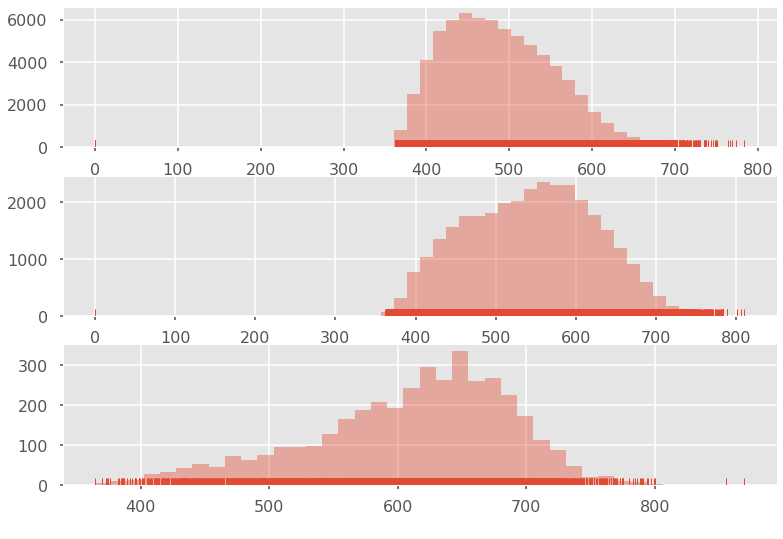

In [75]:
area = plt.figure()
var = 'NU_NOTA_CN'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)

# Nota Ciências Humanas

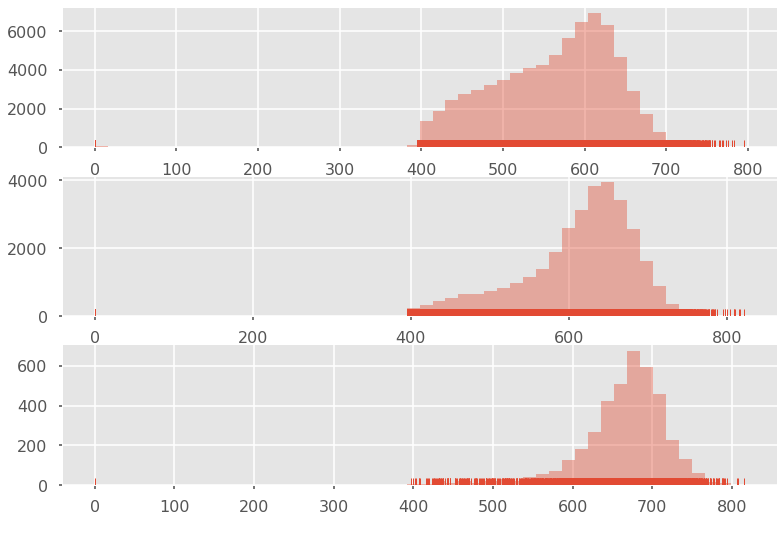

In [76]:
area = plt.figure()
var = 'NU_NOTA_CH'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)

# Nota Matemática e Suas Tecnologias

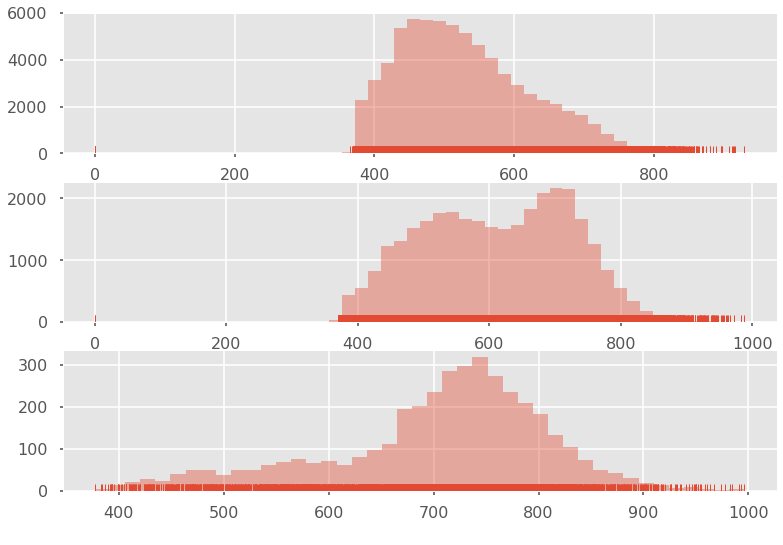

In [77]:
area = plt.figure()
var = 'NU_NOTA_MT'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)

# Nota Linguagens

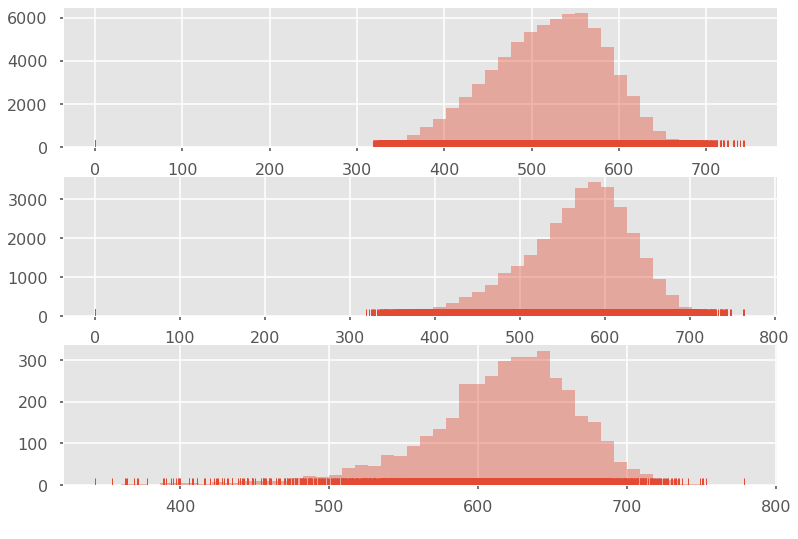

In [78]:
area = plt.figure()
var = 'NU_NOTA_LC'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)

# Nota Redação

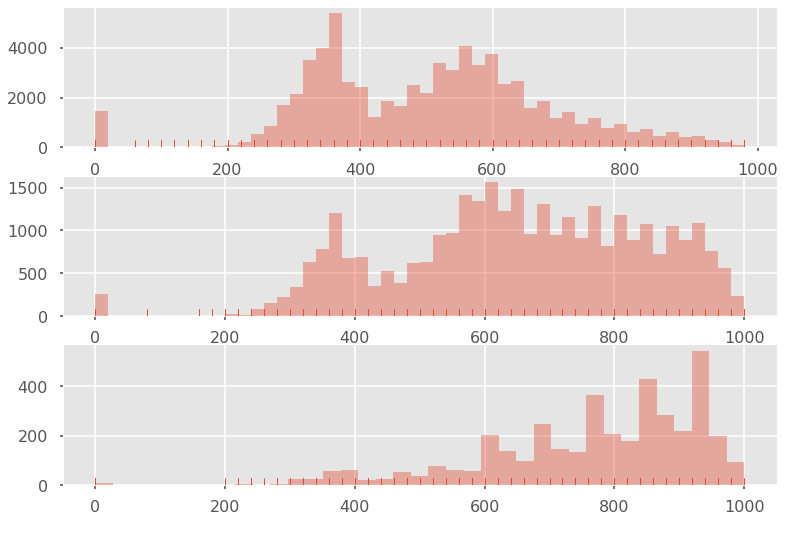

In [79]:
area = plt.figure()
var = 'NU_NOTA_REDACAO'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)